In [1]:
import tensorflow as tf
import numpy as np
import os
import matplotlib.pyplot as plt
from tensorflow.keras.initializers import HeNormal

In [2]:
folder_path='/Users/pushpakumar/Downloads/chest_xray/chest_xray'
train_dir = os.path.join(folder_path, 'train')
test_dir=os.path.join(folder_path, 'test')
val_dir=os.path.join(folder_path, 'val')

In [3]:
batch_size=32
img_size=(32,32)

In [4]:
train_dataset=tf.keras.utils.image_dataset_from_directory(train_dir,shuffle=True,batch_size=batch_size,image_size=img_size)
test_dataset=tf.keras.utils.image_dataset_from_directory(test_dir,shuffle=True,batch_size=batch_size,image_size=img_size)
val_dataset=tf.keras.utils.image_dataset_from_directory(val_dir,shuffle=True,batch_size=batch_size,image_size=img_size)

Found 5216 files belonging to 2 classes.
Found 624 files belonging to 2 classes.
Found 16 files belonging to 2 classes.


In [5]:
class_names=train_dataset.class_names
print(class_names)
print(len(class_names))

['NORMAL', 'PNEUMONIA']
2


In [6]:
model=tf.keras.Sequential([
    tf.keras.layers.InputLayer(input_shape=(32, 32, 3)),
    tf.keras.layers.RandomRotation(0.2),
    tf.keras.layers.RandomZoom(0.3),
    tf.keras.layers.Rescaling(1./127.5,offset=-1),
    
    tf.keras.layers.Conv2D(50, (3, 3), activation='relu',kernel_regularizer=tf.keras.regularizers.l2(0.01)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Dropout(0.45),
    
    tf.keras.layers.Conv2D(100, (3, 3), activation='relu',kernel_regularizer=tf.keras.regularizers.l2(0.01)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Dropout(0.5),
    # tf.keras.layers.MaxPooling2D((2, 2)),
    # tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Conv2D(250, (3, 3), activation='relu',kernel_initializer=HeNormal(),kernel_regularizer=tf.keras.regularizers.l2(0.01)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Dropout(0.4),
    
    # tf.keras.layers.Conv2D(256, (3, 3), activation='relu',kernel_initializer=HeNormal(),kernel_regularizer=tf.keras.regularizers.l2(0.01)),
    # tf.keras.layers.BatchNormalization(),
    # tf.keras.layers.MaxPooling2D((2, 2)),
    # tf.keras.layers.Dropout(0.3),
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(250,activation='relu',kernel_regularizer=tf.keras.regularizers.l2(0.01)),
    tf.keras.layers.Dropout(0.4),   
    tf.keras.layers.Dense(100,activation='relu',kernel_regularizer=tf.keras.regularizers.l2(0.01)),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(75,activation='relu',kernel_regularizer=tf.keras.regularizers.l2(0.01)),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(30,activation='relu',kernel_regularizer=tf.keras.regularizers.l2(0.01)),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(1,activation='sigmoid',kernel_regularizer=tf.keras.regularizers.l2(0.01))
    
    
])

/opt/miniconda3/lib/python3.12/site-packages/keras/src/layers/core/input_layer.py:25: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


In [7]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0002),
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [8]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ random_rotation                 │ (None, 32, 32, 3)      │             0 │
│ (RandomRotation)                │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ random_zoom (RandomZoom)        │ (None, 32, 32, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ rescaling (Rescaling)           │ (None, 32, 32, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 30, 30, 50)     │         1,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 30, 30, 50)     │           200 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 15, 15, 50)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 15, 15, 50)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 13, 13, 100)    │        45,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 13, 13, 100)    │           400 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 6, 6, 100)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 6, 6, 100)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 4, 4, 250)      │       225,250 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 4, 4, 250)      │         1,000 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 2, 2, 250)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 2, 2, 250)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1000)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 250)            │       250,250 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 250)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 100)            │        25,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 75)             │         7,575 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 75)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 30)             │         2,28

 Total params: 558,586 (2.13 MB)

 Trainable params: 557,786 (2.13 MB)

 Non-trainable params: 800 (3.12 KB)

In [9]:
print(train_dataset.element_spec)
print(val_dataset.element_spec)

(TensorSpec(shape=(None, 32, 32, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))
(TensorSpec(shape=(None, 32, 32, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))


In [10]:
batch_size=32
epochs=25
history=model.fit(train_dataset,batch_size=batch_size,epochs=epochs,validation_data=test_dataset)

Epoch 1/25


/opt/miniconda3/lib/python3.12/site-packages/keras/src/backend/tensorflow/nn.py:674: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Sigmoid activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


163/163 ━━━━━━━━━━━━━━━━━━━━ 52s 219ms/step - accuracy: 0.6040 - loss: 13.3065 - val_accuracy: 0.6250 - val_loss: 12.2249
Epoch 2/25
163/163 ━━━━━━━━━━━━━━━━━━━━ 29s 179ms/step - accuracy: 0.6786 - loss: 11.7659 - val_accuracy: 0.6250 - val_loss: 11.1667
Epoch 3/25
163/163 ━━━━━━━━━━━━━━━━━━━━ 33s 199ms/step - accuracy: 0.7157 - loss: 10.4472 - val_accuracy: 0.6282 - val_loss: 9.5160
Epoch 4/25
163/163 ━━━━━━━━━━━━━━━━━━━━ 33s 202ms/step - accuracy: 0.7301 - loss: 9.1339 - val_accuracy: 0.6554 - val_loss: 8.1695
Epoch 5/25
163/163 ━━━━━━━━━━━━━━━━━━━━ 34s 208ms/step - accuracy: 0.7515 - loss: 7.8746 - val_accuracy: 0.8413 - val_loss: 7.0088
Epoch 6/25
163/163 ━━━━━━━━━━━━━━━━━━━━ 32s 193ms/step - accuracy: 0.7777 - loss: 6.7052 - val_accuracy: 0.7837 - val_loss: 5.9697
Epoch 7/25
163/163 ━━━━━━━━━━━━━━━━━━━━ 32s 193ms/step - accuracy: 0.8022 - loss: 5.6671 - val_accuracy: 0.7692 - val_loss: 5.0486
Epoch 8/25
163/163 ━━━━━━━━━━━━━━━━━━━━ 30s 184ms/step - accuracy: 0.8306 - loss: 4.7541 

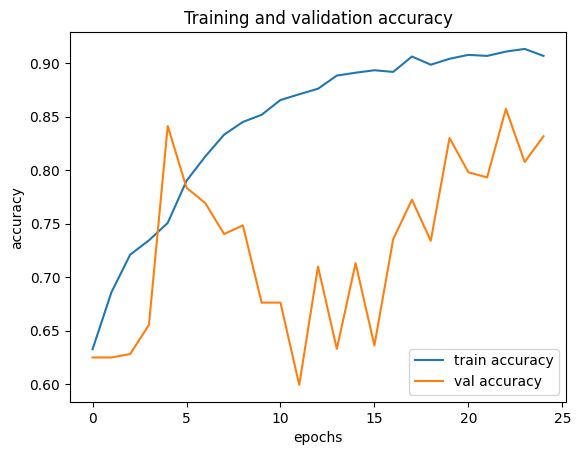

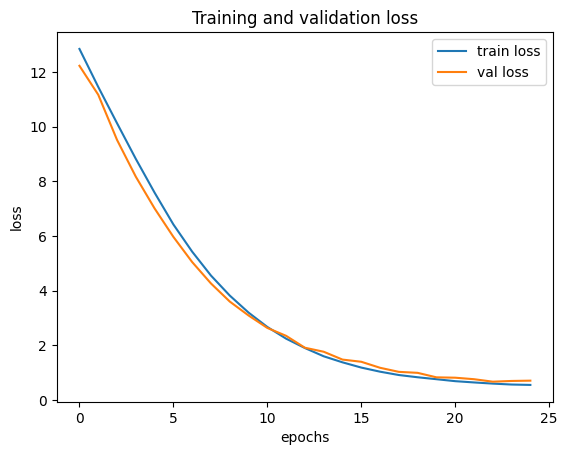

In [11]:
acc= history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']
epochs   = range(len(acc))

plt.plot(epochs, acc, label='train accuracy')
plt.plot(epochs, val_acc, label='val accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend(loc="lower right")
plt.title('Training and validation accuracy')
plt.figure()

plt.plot(epochs, loss, label='train loss')
plt.plot(epochs, val_loss, label='val loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(loc="upper right")
plt.title('Training and validation loss')
plt.show()

In [12]:
loss, accuracy = model.evaluate(test_dataset, verbose=1)
print(accuracy*100)

20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 130ms/step - accuracy: 0.8455 - loss: 0.7052
83.17307829856873


In [13]:
test_images,test_lables=next(iter(test_dataset))
predictions=model.predict(test_images)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 349ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step


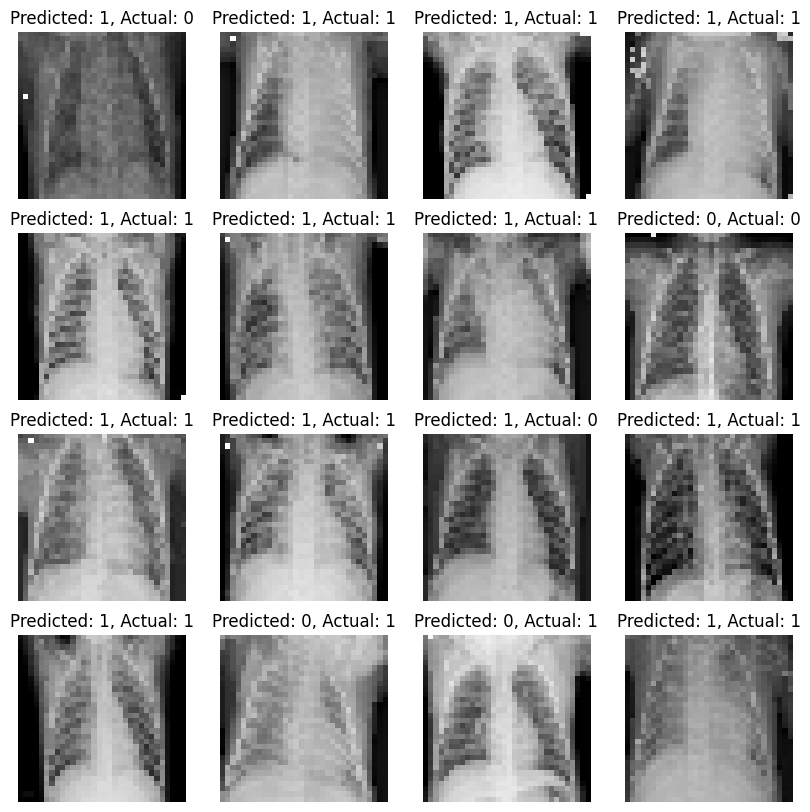

In [24]:
test_images,test_lables=next(iter(test_dataset))
predictions=model.predict(test_images)
plt.figure(figsize=(10, 10))
for i in range(16):
    ax = plt.subplot(4, 4, i + 1)
    plt.imshow(test_images[i]/255)
    if(predictions[i]>=0.5):
        x=1
    else:
        x=0    
    plt.title(f'Predicted: {x}, Actual: {test_lables[i]}')
    plt.axis("off")